In [11]:
# ======================================
# Tugas 1: Multiple Linear Regression
# ======================================

# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Mengatur tampilan grafik
sns.set(style="whitegrid")

In [12]:
# Membaca dataset
df = pd.read_csv('/content/insurance.csv')  # sesuaikan path jika file di lokasi lain

# Menampilkan informasi dasar dataset
print("5 Data Teratas:")
display(df.head())

print("\nInformasi Dataset:")
df.info()

print("\nStatistik Deskriptif:")
display(df.describe())

5 Data Teratas:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistik Deskriptif:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
print("""
Dataset 'insurance.csv' berisi data biaya medis personal berdasarkan beberapa faktor:

- age: Usia pasien (numerik)
- sex: Jenis kelamin ('male' atau 'female')
- bmi: Indeks massa tubuh (numerik)
- children: Jumlah anak yang ditanggung (numerik)
- smoker: Status perokok ('yes' atau 'no')
- region: Wilayah tempat tinggal ('northwest', 'northeast', 'southwest', 'southeast')
- charges: Biaya medis (target / variabel dependen)
""")


Dataset 'insurance.csv' berisi data biaya medis personal berdasarkan beberapa faktor:

- age: Usia pasien (numerik)
- sex: Jenis kelamin ('male' atau 'female')
- bmi: Indeks massa tubuh (numerik)
- children: Jumlah anak yang ditanggung (numerik)
- smoker: Status perokok ('yes' atau 'no')
- region: Wilayah tempat tinggal ('northwest', 'northeast', 'southwest', 'southeast')
- charges: Biaya medis (target / variabel dependen)



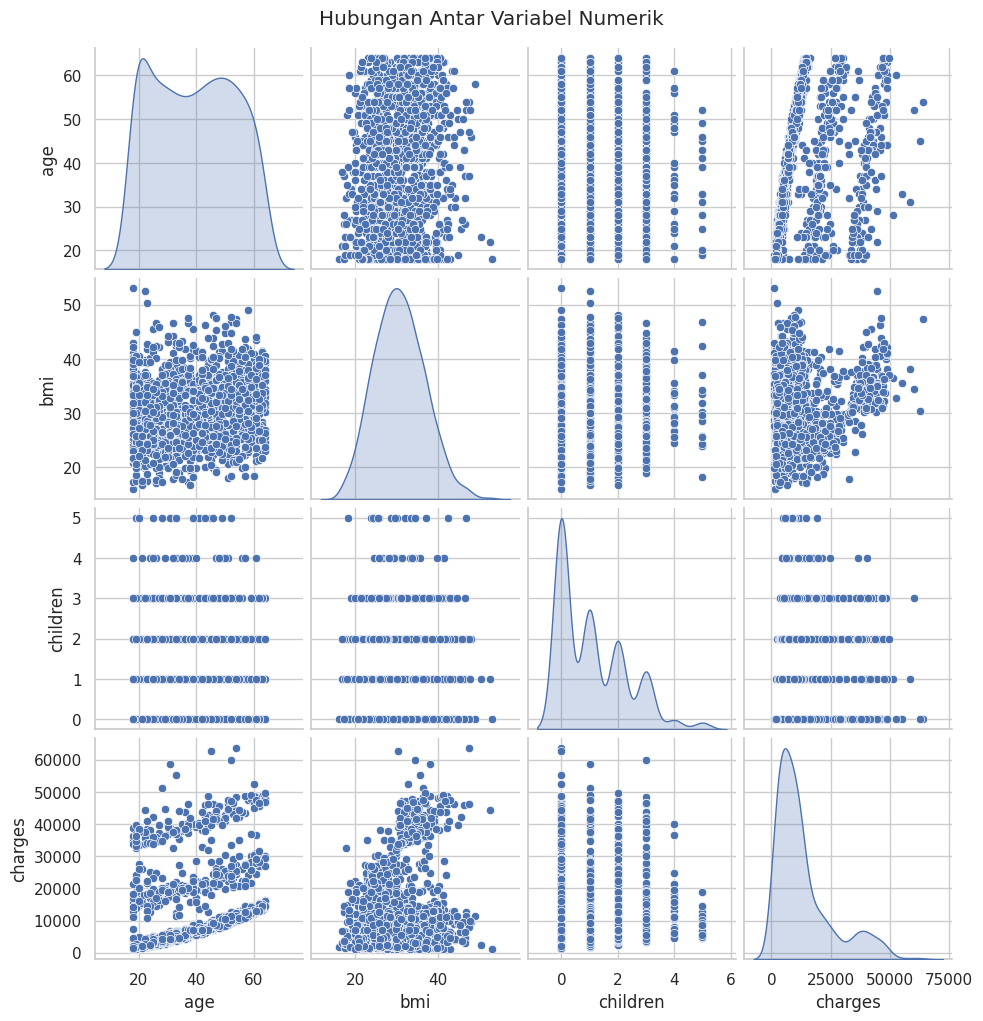

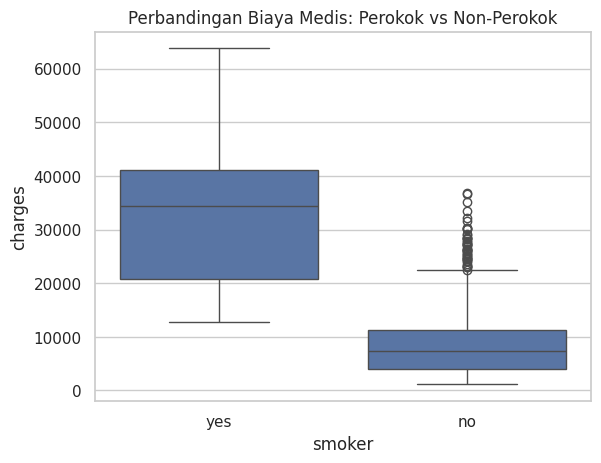

In [14]:
# Pairplot untuk melihat hubungan antar variabel numerik
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], diag_kind='kde')
plt.suptitle("Hubungan Antar Variabel Numerik", y=1.02)
plt.show()

# Boxplot untuk membandingkan biaya medis antara perokok dan non-perokok
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Perbandingan Biaya Medis: Perokok vs Non-Perokok")
plt.show()

In [15]:
# Menentukan fitur (X) dan target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Menentukan kolom numerik dan kategorikal
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Membuat transformer
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # hindari dummy trap

# Menggabungkan preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [16]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji  : {X_test.shape}")

Ukuran data latih: (1070, 6)
Ukuran data uji  : (268, 6)


In [17]:
# Membuat pipeline model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Melatih model
model.fit(X_train, y_train)
print("Model telah dilatih dengan data training.")

Model telah dilatih dengan data training.


In [18]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("🔹 Hasil Evaluasi Model:")
print(f"R-squared : {r2:.4f}")
print(f"MSE        : {mse:.2f}")
print(f"MAE        : {mae:.2f}")

🔹 Hasil Evaluasi Model:
R-squared : 0.7836
MSE        : 33596915.85
MAE        : 4181.19


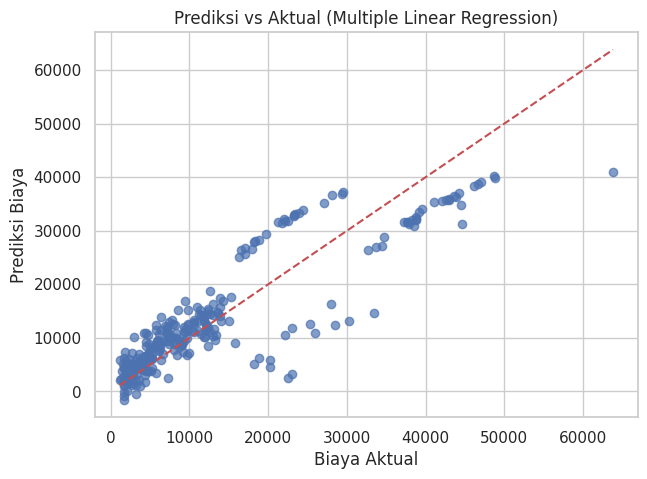

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Biaya Aktual")
plt.ylabel("Prediksi Biaya")
plt.title("Prediksi vs Aktual (Multiple Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [20]:
print("""
Analisis Hasil:

- Nilai R-squared menunjukkan seberapa besar variasi biaya medis yang dapat dijelaskan oleh model.
- MSE dan MAE menunjukkan rata-rata kesalahan prediksi (semakin kecil semakin baik).
- Faktor 'smoker' biasanya memiliki pengaruh terbesar terhadap biaya medis.
- Jika R² mendekati 1, model sudah cukup baik dalam menjelaskan data.
""")


Analisis Hasil:

- Nilai R-squared menunjukkan seberapa besar variasi biaya medis yang dapat dijelaskan oleh model.
- MSE dan MAE menunjukkan rata-rata kesalahan prediksi (semakin kecil semakin baik).
- Faktor 'smoker' biasanya memiliki pengaruh terbesar terhadap biaya medis.
- Jika R² mendekati 1, model sudah cukup baik dalam menjelaskan data.

